# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [337]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [4]:
# Checking the number of mice.
mouse_count = len(mouse_data_complete["Mouse ID"].unique())
mouse_count

249

In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_data_complete.duplicated(['Mouse ID', 'Timepoint'])''
duplicate_mouse_dataframe = mouse_data_complete[mouse_data_complete.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_mouse = duplicate_mouse_dataframe['Mouse ID'].iat[2]
duplicate_mouse

'g989'

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_data_complete[mouse_data_complete['Mouse ID'].str.contains('g989')]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_data_complete.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = False)

cleaned_mouse_data = cleaned_mouse_data[cleaned_mouse_data['Mouse ID'].str.contains('g989') == False]

cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [81]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_mouse_data["Mouse ID"].unique())
cleaned_mouse_count

248

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_mean = cleaned_mouse_data.groupby(["Drug Regimen"]).mean(numeric_only = True)
mouse_median = cleaned_mouse_data.groupby(["Drug Regimen"]).median(numeric_only = True)
mouse_var = cleaned_mouse_data.groupby(["Drug Regimen"]).var(numeric_only = True)
mouse_std = cleaned_mouse_data.groupby(["Drug Regimen"]).std(numeric_only = True)
mouse_sem = cleaned_mouse_data.groupby(["Drug Regimen"]).sem(numeric_only = True)

mouse_summary_statistics = pd.concat([mouse_mean['Tumor Volume (mm3)'], mouse_median['Tumor Volume (mm3)'], mouse_var['Tumor Volume (mm3)'], mouse_std['Tumor Volume (mm3)'], mouse_var['Tumor Volume (mm3)'], mouse_sem['Tumor Volume (mm3)']], axis = 1, keys = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'Standard Error of the Mean'])
mouse_summary_statistics


,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,24.947764
Ceftamin,52.591172,51.776157,39.290177,6.268188,39.290177
Infubinol,52.884795,51.820584,43.128684,6.567243,43.128684
Ketapril,55.235638,53.698743,68.553577,8.279709,68.553577
Naftisol,54.331565,52.509285,66.173479,8.134708,66.173479
Placebo,54.033581,52.288934,61.168083,7.821003,61.168083
Propriva,52.320930,50.446266,43.852013,6.622085,43.852013
Ramicane,40.216745,40.673236,23.486704,4.846308,23.486704
Stelasyn,54.233149,52.431737,59.450562,7.710419,59.450562


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

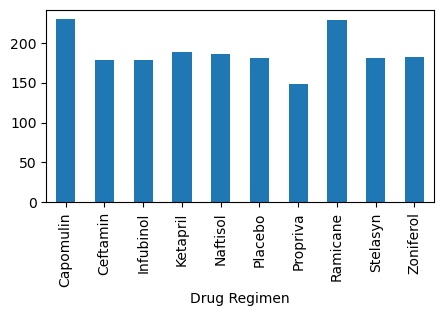

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_drug_type = cleaned_mouse_data.groupby('Drug Regimen')
count_drug_times = mouse_drug_type['Drug Regimen'].count()
count_drug_times.plot(kind="bar", figsize=(5,2.5))

<BarContainer object of 10 artists>

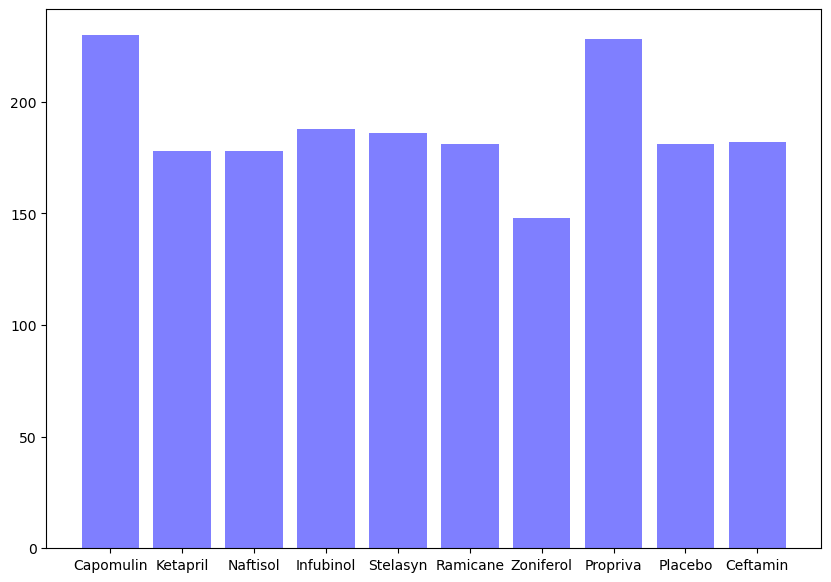

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen = list(cleaned_mouse_data['Drug Regimen'].unique())

count_drug_times = mouse_drug_type['Drug Regimen'].count()

plt.figure(figsize = (10,7))
plt.bar(drug_regimen, count_drug_times, color='b', alpha=0.5, align="center")

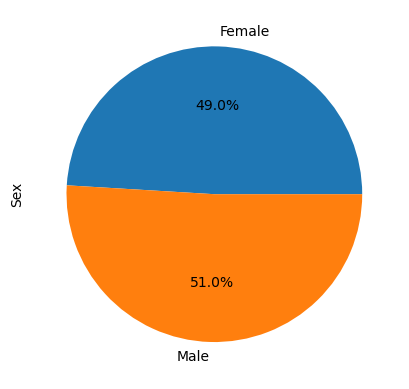

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_type = cleaned_mouse_data.groupby('Sex')
mouse_sex_count = mouse_sex_type['Sex'].count()
mouse_sex_pie = mouse_sex_count.plot(kind="pie",autopct="%1.1f%%")

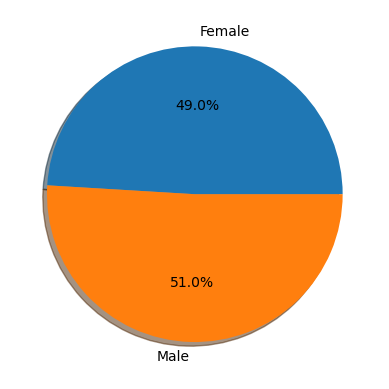

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
plt.pie(mouse_sex_count, labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [365]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_clean_data = cleaned_mouse_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
final_clean_data = final_clean_data[final_clean_data['Drug Regimen'].str.contains('Capomulin|Ramicane|Infubinol|Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
last_time_per_mouse = final_clean_data.sort_values(['Mouse ID', 'Timepoint'], ascending = False).drop_duplicates('Mouse ID')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_time_data= pd.merge(cleaned_mouse_data, last_time_per_mouse, on =["Timepoint"])
merged_time_data

,Mouse ID_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Mouse ID_y,Tumor Volume (mm3)_y,Drug Regimen_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,x226,45.000000,Ceftamin
1,b128,0,45.000000,0,Capomulin,Female,9,22,u153,45.000000,Ceftamin
2,b128,0,45.000000,0,Capomulin,Female,9,22,t573,45.000000,Ceftamin
3,b128,0,45.000000,0,Capomulin,Female,9,22,b447,45.000000,Ceftamin
4,f932,0,45.000000,0,Ketapril,Male,15,29,x226,45.000000,Ceftamin
...,...,...,...,...,...,...,...,...,...,...,...
15406,m601,45,28.430964,1,Capomulin,Male,22,17,a444,43.047543,Ramicane
15407,m601,45,28.430964,1,Capomulin,Male,22,17,a411,38.407618,Ramicane
15408,m601,45,28.430964,1,Capomulin,Male,22,17,a275,62.999356,Ceftamin
15409,m601,45,28.430964,1,Capomulin,Male,22,17,a251,65.525743,Infubinol


In [372]:
# Put treatments into a list for for loop (and later for plot labels)
list_drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
list_tumor_volume_capomulin = []
list_tumor_volume_ramicane = []
list_tumor_volume_infubinol = []
list_tumor_volume_ceftamin = []

capomulin_tumor = last_time_per_mouse[(last_time_per_mouse["Drug Regimen"] == "Capomulin")]
ramicane_tumor = last_time_per_mouse[(last_time_per_mouse["Drug Regimen"] == "Ramicane")]
infubinol_tumor = last_time_per_mouse[(last_time_per_mouse["Drug Regimen"] == "Infubinol")]
ceftamin_tumor = last_time_per_mouse[(last_time_per_mouse["Drug Regimen"] == "Ceftamin")]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in capomulin_tumor['Tumor Volume (mm3)']:
    list_tumor_volume_capomulin.append(i)

for i in ramicane_tumor['Tumor Volume (mm3)']:
    list_tumor_volume_ramicane.append(i)
    
for i in infubinol_tumor['Tumor Volume (mm3)']:
    list_tumor_volume_infubinol.append(i)
    
for i in ceftamin_tumor['Tumor Volume (mm3)']:
    list_tumor_volume_ceftamin.append(i)
    
quartiles_capomulin = capomulin_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_ramicane = ramicane_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_infubinol = infubinol_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_ceftamin = ceftamin_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])

print("Capomulin:")
print(quartiles_capomulin)
print("Ramicane:")
print(quartiles_ramicane)
print("Infubinol:")
print(quartiles_infubinol)
print("Ceftamin:")
print(quartiles_ceftamin)

quartiles_capomulin =capomulin_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

quartiles_ramicane =ramicane_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

quartiles_infubinol =infubinol_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

quartiles_ceftamin =ceftamin_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

# Locate the rows which contain mice on each drug and get the tumor volumes
final_clean_data
    
# Determine outliers using upper and lower bounds
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin) 
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane) 
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol) 
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin) 
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

Capomulin:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Ramicane:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
Infubinol:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='[Data]'>

<Figure size 640x480 with 0 Axes>

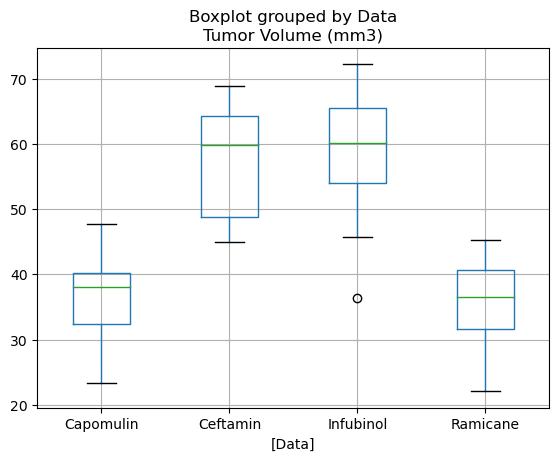

In [371]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df = pd.DataFrame(capomulin_tumor['Tumor Volume (mm3)'])
df2 = pd.DataFrame(ramicane_tumor['Tumor Volume (mm3)'])
df3 = pd.DataFrame(infubinol_tumor['Tumor Volume (mm3)'])
df4 = pd.DataFrame(ceftamin_tumor['Tumor Volume (mm3)'])

df['Data'] = 'Capomulin'
df2['Data'] = 'Ramicane'
df3['Data'] = 'Infubinol'
df4['Data'] = 'Ceftamin'

total = [df, df2, df3, df4]

tumor_by_group = pd.concat(total)

plt.figure()
tumor_by_group.boxplot(by = 'Data')


## Line and Scatter Plots

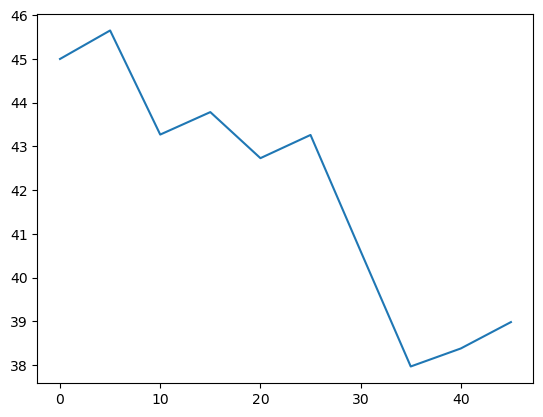

In [373]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
final_clean_data_capomulin = final_clean_data[final_clean_data['Drug Regimen'].str.contains('Capomulin')]

mouse_of_interest = 'b128'
final_clean_data_capomulin = final_clean_data[final_clean_data['Mouse ID'].str.contains(mouse_of_interest)]
final_clean_data_capomulin


tumor_volume = list(final_clean_data_capomulin['Tumor Volume (mm3)'])
time_point = list(final_clean_data_capomulin['Timepoint'])

plt.plot(time_point, tumor_volume)
plt.show()

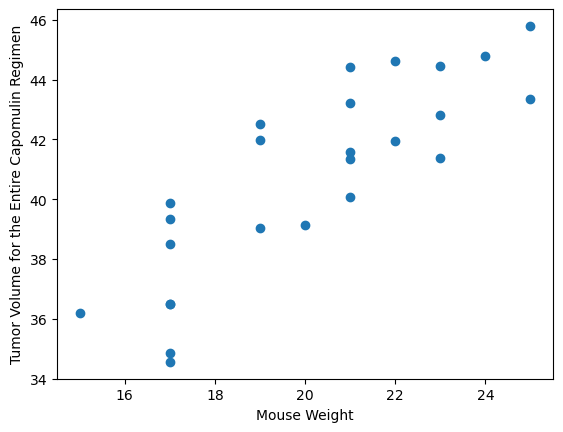

In [301]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

final_clean_data_mouse_weight = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'].str.contains('Capomulin')]

avg_tumor_df = final_clean_data_mouse_weight.groupby('Mouse ID').mean('Tumor Volume (mm3)')

avg_tumor = list(avg_tumor_df['Tumor Volume (mm3)'])

mouse_weight = list(avg_tumor_df['Weight (g)'])

plt.scatter(mouse_weight,avg_tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume for the Entire Capomulin Regimen')
plt.show()

## Correlation and Regression

In [375]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between the average observed tumor volume for the entire capomulin regimen is {round(st.pearsonr(avg_tumor,mouse_weight)[0],2)}")

d_slope, d_int, d_r, d_p, d_std_err = st.linregress(mouse_weight, avg_tumor)
array = np.asarray(mouse_weight)
d_fit = np.multiply(array, d_slope)+d_int


The correlation coefficient between the average observed tumor volume for the entire capomulin regimen is 0.84


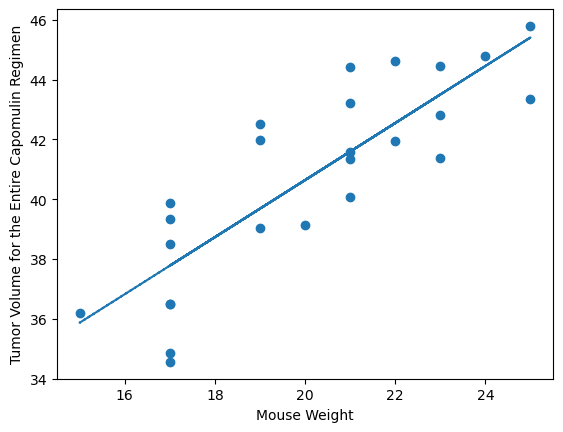

In [376]:
# Linear regression model
plt.scatter(mouse_weight,avg_tumor)
plt.plot(mouse_weight,d_fit,"--")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume for the Entire Capomulin Regimen')
plt.show()